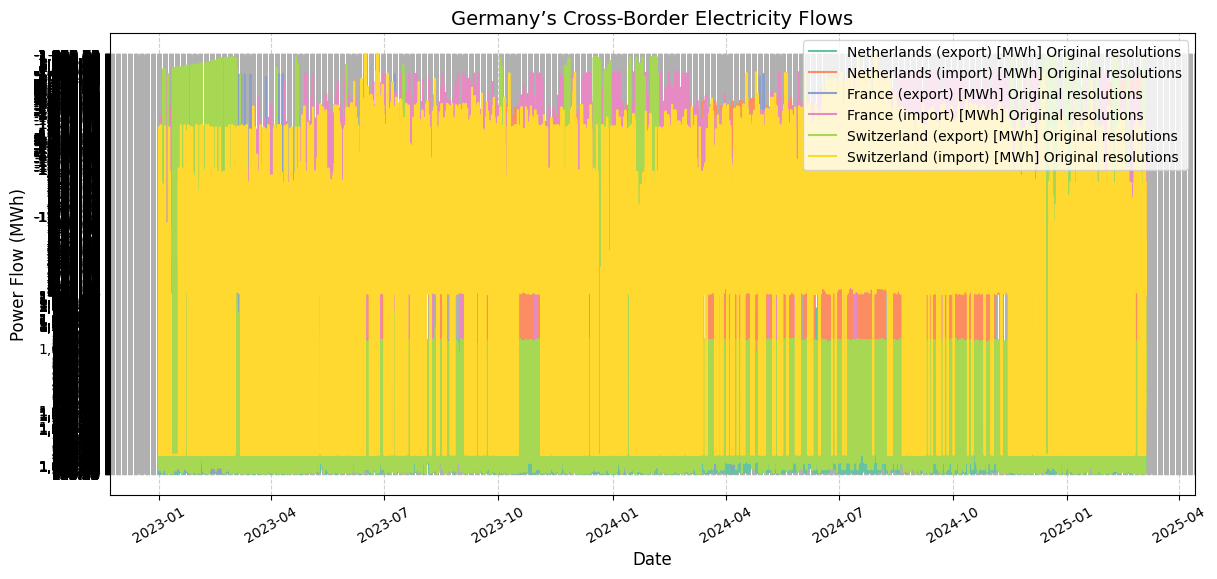

✅ Cross-border electricity flow plot saved as 'cross_border_flows_enhanced.png'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
BASE_DIR = os.getcwd()
PLOTS_DIR = os.path.join(BASE_DIR, "..", "visualizations")
os.makedirs(PLOTS_DIR, exist_ok=True)

file_path = "../data/transformed/transformed_refined_Cross-border_physical_flows_202301010000_202503050000_Quarterhour.csv"

# =========================
# 📌 Load Dataset
# =========================
df = pd.read_csv(file_path, delimiter=",", decimal=",", low_memory=False)

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")

# =========================
# 📌 Extract Relevant Columns
# =========================
selected_countries = [
    "Netherlands (export) [MWh] Original resolutions", "Netherlands (import) [MWh] Original resolutions",
    "France (export) [MWh] Original resolutions", "France (import) [MWh] Original resolutions",
    "Switzerland (export) [MWh] Original resolutions", "Switzerland (import) [MWh] Original resolutions"
]

# Ensure all required columns exist
missing_cols = [col for col in selected_countries if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns not found in the dataset: {missing_cols}")

df_selected = df[["Start date"] + selected_countries]

# =========================
# 📌 Plot Cross-Border Flows
# =========================
plt.figure(figsize=(14, 6))
colors = sns.color_palette("Set2", n_colors=len(selected_countries))

for country, color in zip(selected_countries, colors):
    plt.plot(df_selected["Start date"], df_selected[country], label=country, color=color, linewidth=1.5)

# =========================
# 📌 Labels, Title & Formatting
# =========================
plt.xlabel("Date", fontsize=12)
plt.ylabel("Power Flow (MWh)", fontsize=12)
plt.title("Germany’s Cross-Border Electricity Flows", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=30)

# =========================
# 📌 Save & Show Plot
# =========================
plot_filename = "cross_border_flows_enhanced.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Cross-border electricity flow plot saved as '{plot_filename}'.")
